In [6]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import socket
import sys
import os
home = os.path.expanduser("~")

sys.path.append(home+'/py_f2recom/GlobalAssessment/')
sys.path.append(home+ '/py_f2recom/modules/')
sys.path.append(home+ '/py_f2recom/modules/pyfesom2')
import pyfesom2 as pf

sys.path.append(home+'/py_f2recom/modules/SkillMetrics/')
import skill_metrics as sm
sys.path.append(home+ '/py_f2recom/modules/cmocean-master/')
import cmocean as cmo

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from load_interp_GLODAP_python3 import GLODAPdata

Autosaving every 5 seconds


In [7]:
#    Only modify parameters and paths in this cell       #
#  In principle, you don't have to modify anything else  #


# run specification -------------------------------------------------------------------------------------   
runid      =  'fesom'
simu_name = 'standard'

# defines paths ----------------------------------------------------------------------------------------- 

runname     = 'A'
savepath    = os.getcwd()+'/'
print(savepath)
resultpath = '/albedo/work/projects/MarESys/GCB2022/'+runname+'/'
evalpath = '/albedo/work/projects/p_pool_recom/eval/'
evalpath2 = '/albedo/work/projects/MarESys/ogurses/input/corrected_input/'
meshpath = '/albedo/work/projects/p_bio/mesh/core2'

# period of analysis ------------------------------------------------------------------------------------
first_year_maps = 2011
first_year = 2011
last_year  = 2020
    
years = np.arange(first_year,last_year+1,1)
years_last10 = np.arange(first_year_maps,last_year+1,1)

# specification of analysis ------------------------------------------------------------------------------------

layerwise = False
depths = (0,50,200,1000,2000) # If layerwise is True, you can define depths here, by defaut: (0,50,200,1000,2000,4000)
depth_limit = 50
mapproj = 'rob'
#Map projection. Options are Mercator (merc), Plate Carree (pc),
#North Polar Stereo (np), South Polar Stereo (sp),  Robinson (rob)
#Robinson projection is quite time consuming.

# export of analysis ------------------------------------------------------------------------------------
savefig = True
verbose = False
output = False
plotting = True
Taylor = False

/albedo/home/loziel/py_f2recom/Gurses_et_al_2022/


In [8]:
# Prepare output files & paths ----------------------------------------------------------------------
today = date.today().strftime("_%Y_%m_%d")
htmlname     =  simu_name+'_'+ today +'.html'
htmlpath = savepath

if not os.path.exists(htmlpath): # create folders if do not exist
    os.makedirs(htmlpath)
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
# initialization input file specifications -----------------------------------------------------------

ncfileCO2f               = evalpath+'dataset_CO2_Chauetal2020.nc'

# just to check
if(verbose):
    print('Processing years {4} to {5}\n\nReading out of {0}\nStoring graphs to {1}\nStoring html to {2} as {3}'.format(
        resultpath, savepath, htmlpath, htmlname,years[0],years[-1]))

    print('\nLast ten years are \n{0}'.format(years_last10))
    
# mesh initialization -----------------------------------------------------------
mesh = pf.load_mesh(meshpath)

/albedo/work/projects/p_bio/mesh/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /albedo/work/projects/p_bio/mesh/core2/pickle_mesh_py3_fesom2


***
Loading Chau et al. file: /albedo/work/projects/p_pool_recom/eval/dataset_CO2_Chauetal2020.nc
***

***
 years extracted in Chau et al. 2011-2020 
***
<function shape at 0x7fb1c00d4c10>


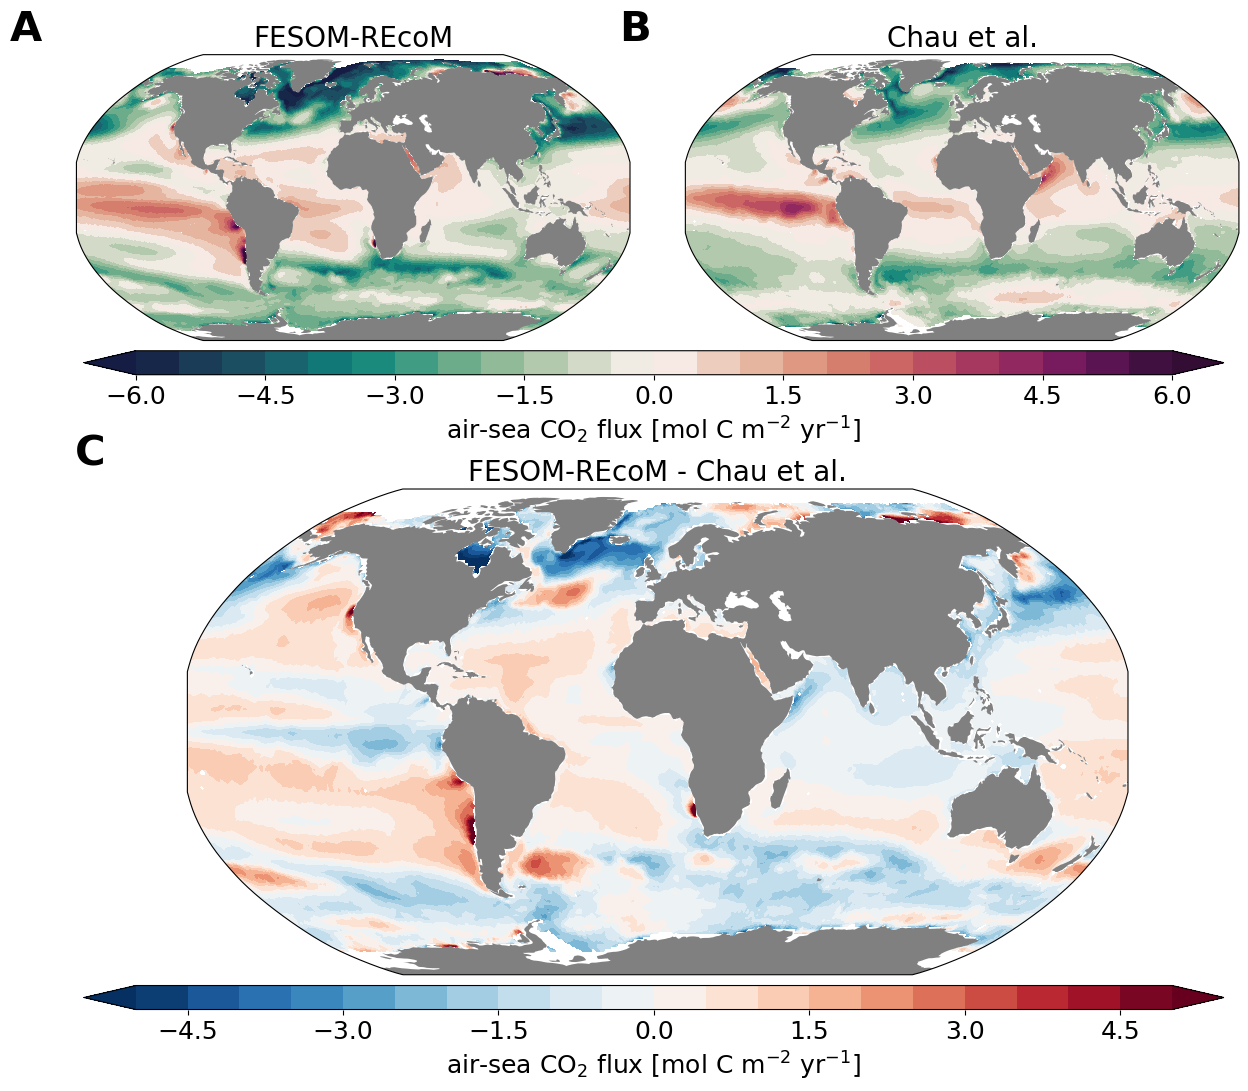


Original Taylor stats:
SDEV pred: 2.10396, ref: 1.64639
CRMS pred: 1.46948, ref: 0.00000
CORRCOEF: 0.71853

Normalized Taylor stats:
SDEV pred: 1.27792, ref: 1.00000
CRMS pred: 0.89255, ref: 0.00000
CORRCOEF: 0.71853
Adjust axis max to 1.5


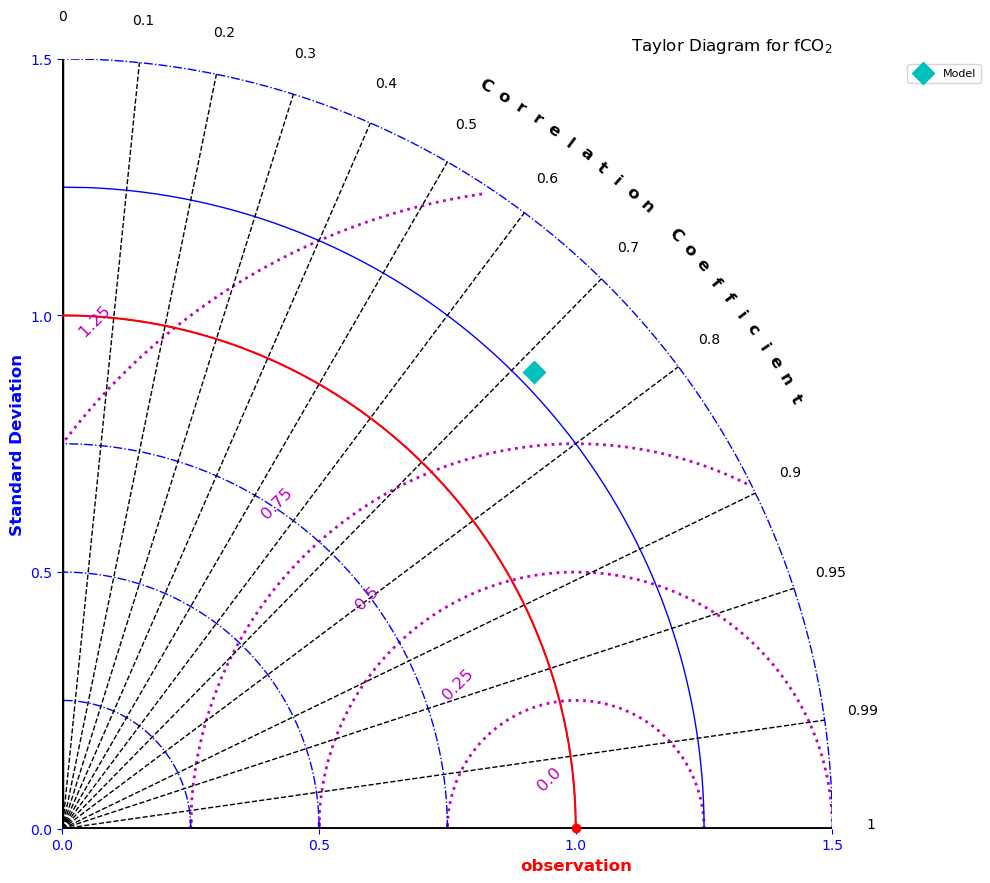

In [9]:
#!jupyter nbconvert --to=python /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/pCO2Chauetal_python3.ipynb
from pCO2Chauetal_python3 import pCO2ccomp

pCO2ccomp(runid,resultpath,savepath,mesh,ncfileCO2f,first_year,last_year,
                mapproj=mapproj,
                savefig=savefig,
                cmap=cmo.cm.curl)

***
Loading Chau et al. file: /albedo/work/projects/p_pool_recom/eval/dataset_CO2_Chauetal2020.nc
***

***
 years extracted in Chau et al. 2011-2020 
***
<function shape at 0x7fb1c00d4c10>


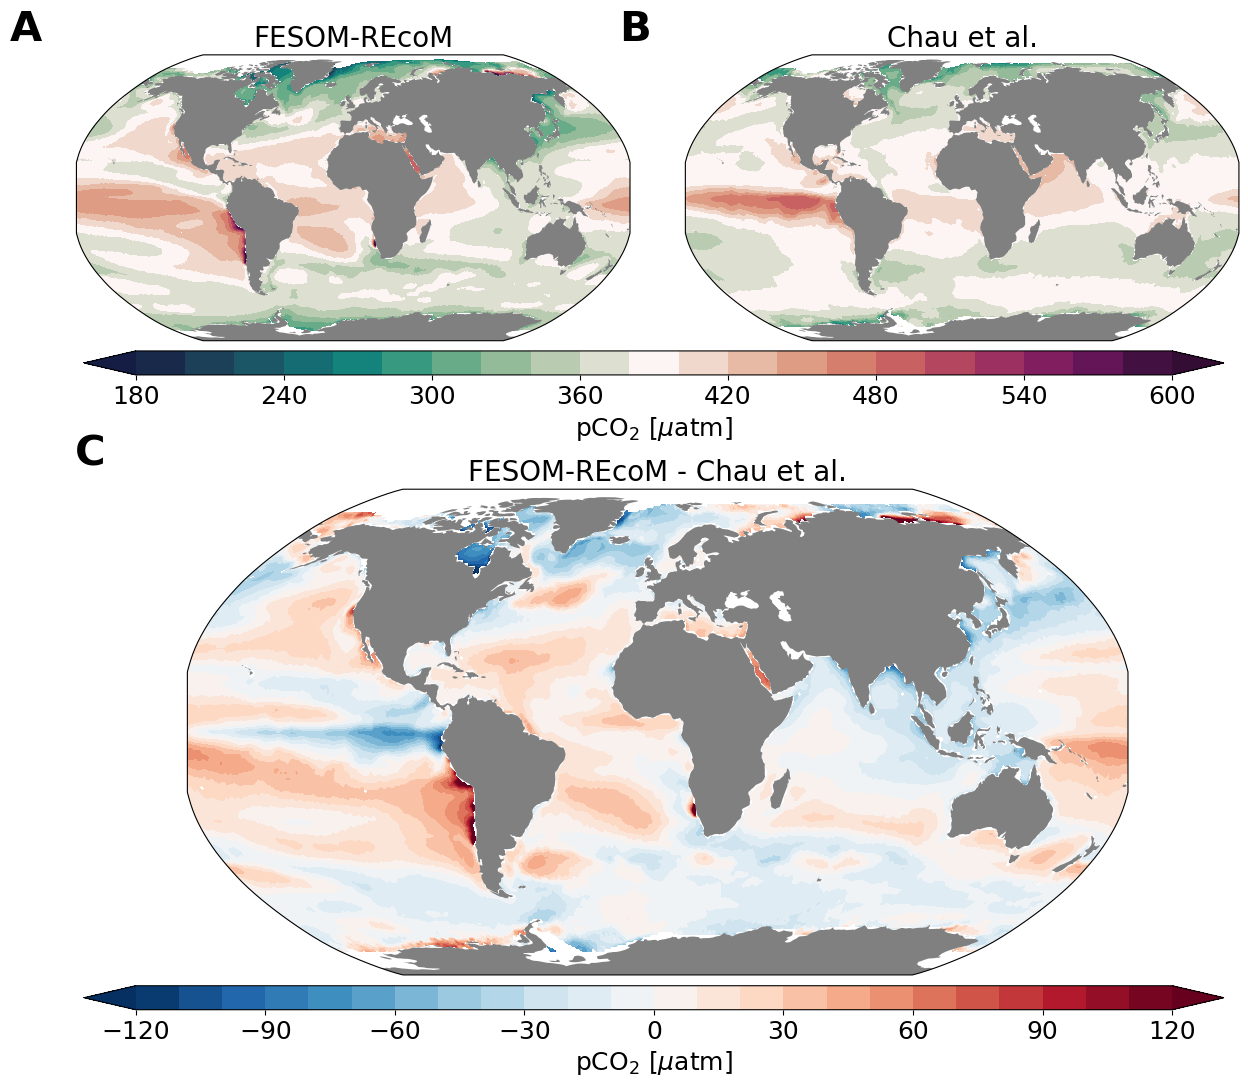


Original Taylor stats:
SDEV pred: 43.66476, ref: 34.73755
CRMS pred: 29.42690, ref: 0.00000
CORRCOEF: 0.74082

Normalized Taylor stats:
SDEV pred: 1.25699, ref: 1.00000
CRMS pred: 0.84712, ref: 0.00000
CORRCOEF: 0.74082
Adjust axis max to 1.5


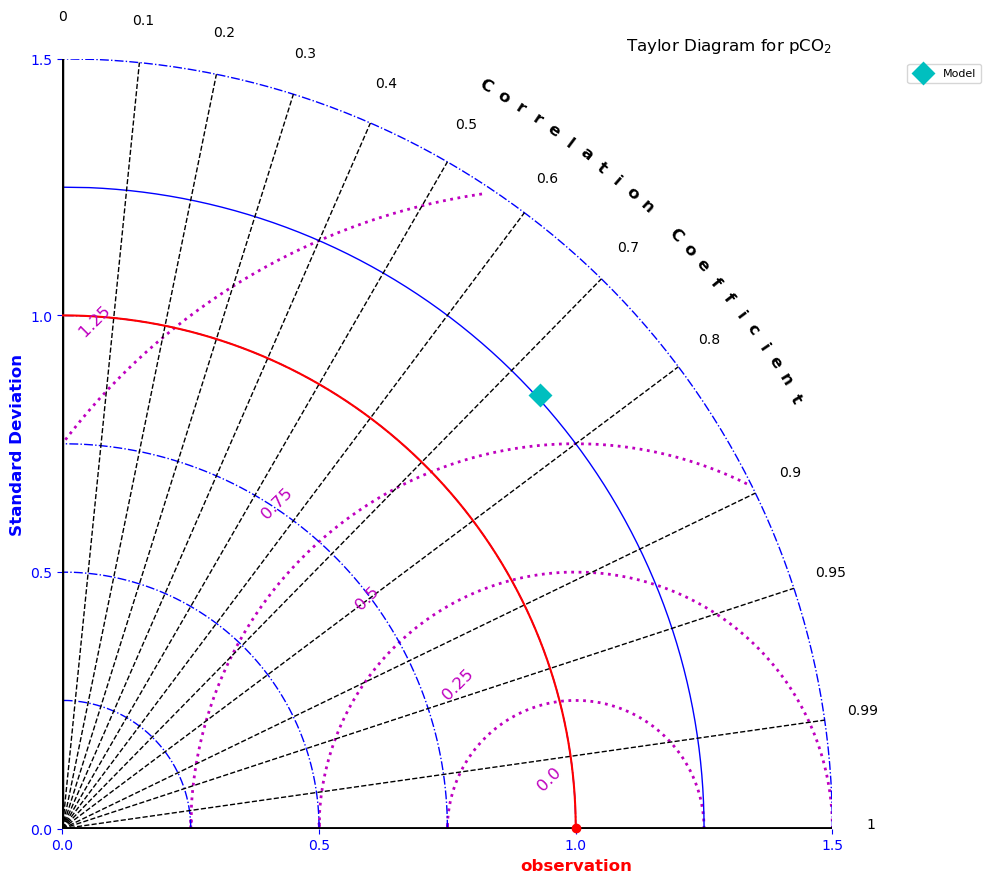

In [10]:
#!jupyter nbconvert --to=python pCO2Chauetal_python3.ipynb
from pCO2Chauetal_python3 import pCO2ccomp

pCO2ccomp(runid,resultpath,savepath,mesh,ncfileCO2f,first_year,last_year,
                mapproj=mapproj,
                savefig=savefig,
                SOCATvar='spco2',
                cmap=cmo.cm.curl)

In [11]:
!ncdump 

ncdump [-c|-h] [-v ...] [[-b|-f] [c|f]] [-l len] [-n name] [-p n[,n]] [-k] [-x] [-s] [-t|-i] [-g ...] [-w] [-F] [-Ln] file
  [-c]             Coordinate variable data and header information
  [-h]             Header information only, no data
  [-v var1[,...]]  Data for variable(s) <var1>,... only
  [-b [c|f]]       Brief annotations for C or Fortran indices in data
  [-f [c|f]]       Full annotations for C or Fortran indices in data
  [-l len]         Line length maximum in data section (default 80)
  [-n name]        Name for netCDF (default derived from file name)
  [-p n[,n]]       Display floating-point values with less precision
  [-k]             Output kind of netCDF file
  [-s]             Output special (virtual) attributes
  [-t]             Output time data as date-time strings
  [-i]             Output time data as date-time strings with ISO-8601 'T' separator
  [-g grp1[,...]]  Data and metadata for group(s) <grp1>,... only
  [-w]             With client-side caching of va